In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import pandas as pd
df = pd.read_csv('drive/My Drive/Fall APM Project/totalwithmaininfo.csv',sep=',')

In [0]:
df=df.drop(df.columns[0], axis=1)

In [0]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [0]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [0]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [0]:
x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [0]:
x_test.shape

(2400, 8)

In [0]:
x_train.shape

(8160, 8)

In [0]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(1632,5,8)
x_shaped_test  = np.array(x_test).reshape(480,5,8)

In [0]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

1632
480


In [0]:
x_shaped_train.shape

(1632, 5, 8)

In [0]:
x_shaped_test.shape

(480, 5, 8)

In [0]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1632, 1)

In [0]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(480, 1)

In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(x_shaped_train, y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=50, batch_size=  10)
model.predict_classes(x_shaped_test)

Train on 1632 samples, validate on 480 samples
Epoch 1/50
1632/1632 [==============================] - 12s 7ms/step - loss: 1.8725 - acc: 0.5067 - val_loss: 0.8818 - val_acc: 0.5000
Epoch 2/50
1632/1632 [==============================] - 5s 3ms/step - loss: 1.3471 - acc: 0.5049 - val_loss: 0.7641 - val_acc: 0.5000
Epoch 3/50
1632/1632 [==============================] - 5s 3ms/step - loss: 1.1087 - acc: 0.5196 - val_loss: 0.6838 - val_acc: 0.5063
Epoch 4/50
1632/1632 [==============================] - 5s 3ms/step - loss: 1.0269 - acc: 0.5233 - val_loss: 0.6678 - val_acc: 0.5208
Epoch 5/50
1632/1632 [==============================] - 5s 3ms/step - loss: 0.9817 - acc: 0.5349 - val_loss: 0.7833 - val_acc: 0.5000
Epoch 6/50
1632/1632 [==============================] - 5s 3ms/step - loss: 0.9452 - acc: 0.5386 - val_loss: 0.8000 - val_acc: 0.5000
Epoch 7/50
1632/1632 [==============================] - 5s 3ms/step - loss: 1.0774 - acc: 0.5355 - val_loss: 0.7276 - val_acc: 0.5000
Epoch 8/50
163

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn))
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.7708333333333334, 0.7533632286995516, 0.8585590277777778]
[[202  38]
 [ 72 168]]


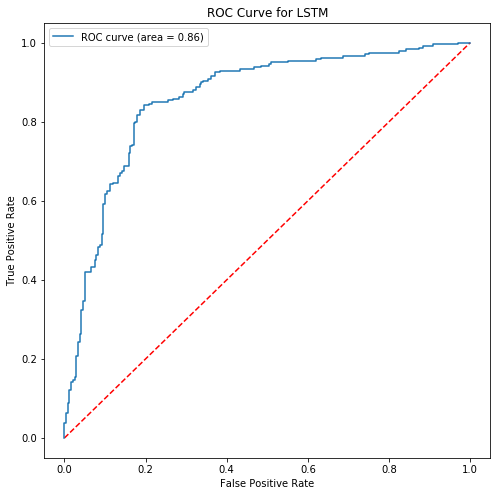

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

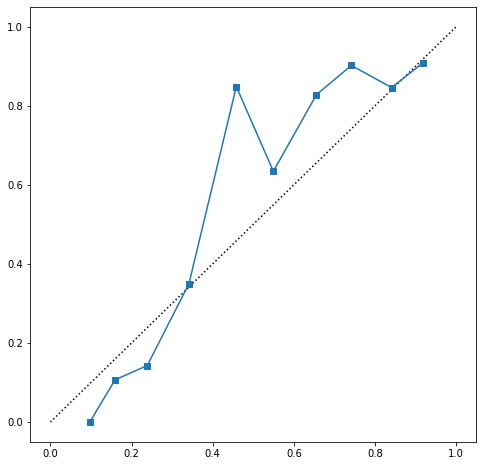

In [0]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')